# Introducción al análisis de fútbol con datos de seguimiento en python (Parte 2)

El libro tiene como objetivo mostrar determinadas acciones ocurridas en un encuentro de fútbol, analizando eventos de **metrica sports**.

**Autor del libro:** Jorge Mendoza  [[@AIJorgeMendoza]](https://twitter.com/AIJorgeMendoza)

**Fuente:** Laurie Shaw / Friends of Tracking [[@EightyFivePoint]](https://twitter.com/EightyFivePoint)

## Objetivos a desarrollar



*   Dibujar los pases y disparos antes del segundo y tercer gol en el partido.
*   Dibujar todos los tiros  del **jugador 9** del equipo local. Use un símbolo y una transparencia diferentes (aplha) para los tiros que resultaron en goles.
*   Dibujar las posiciones de todos los jugadores en el gol del **Jugador 9**.
*   Calcular el recorrido realizado por cada jugador.




## Importación de librerías y carga de datos

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os, sys
from os import rmdir
from os import remove

Nota: El comando de la siguiente celda solo servirá si deseamos trabajar con directorios de google drive. Si no se trabaja con google drive omitir la ejecución del comando y configurar el directorio local.

In [0]:
#from google.colab import drive
#drive.mount('/content/drive/')

En el siguiente comando indicaremos la ruta local/nube en el cual estarán nuestros datos a analizar (archivos csv) y las librerías que vamos a importar y son externas.

Recomendación: Usar una única ruta de trabajo.

In [0]:
ruta_librerias = '/content/sample_data'
ruta_datos_csv = '/content/sample_data/data'

In [0]:
#En el caso que estés en Google Drive
#cd 'drive/My Drive/tu_ruta'
os.chdir(ruta_librerias) 
os.getcwd()

'/content/sample_data'

Una vez definida la ruta en la cual vamos a tener los archivos, vamos a definir los archivos que utilizaremos en este cuaderno:

Los datos que vamos analizar/visualizar será el csv:


*   Sample_Game_2_RawEventsData
*   Sample_Game_2_RawTrackingData_Away_Team
*   Sample_Game_2_RawTrackingData_Home_Team


URL de los datos: https://github.com/metrica-sports/sample-data

Para trabajar y visualizar los datos vamos a importar librerías desarrolladas por Laurie's. Son archivos que utilizan librerías como matplotlib, numpy, scipy, pandas.


*   Metrica_IO.py
*   Metrica_PitchControl.py
*   Metrica_Velocities.py
*   Metrica_Viz.py


URL: https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking

No olvidar revisar la primera parte del libro accediendo al siguiente [link](https://medium.com/@jorgemendozarivilla/iniciando-con-el-an%C3%A1lisis-de-datos-en-el-f%C3%BAtbol-con-python-62afa2c25703).

Para el actual libro vamos a importar los archivos de la siguiente línea de comando.

In [0]:
import Metrica_IO as mio
import Metrica_Viz as mviz

## Carga de datos a analizar

Las librerías que importamos están preparadas para leer los archivos csv que descargamos del repositorio, para ello tenemos que indicar que juego vamos analizar, en este caso el 'Data/SampleGame2/...csv' , por eso inicializamos:  

```
juego_analizar = 2
```



In [0]:
juego_analizar = 2
eventos = mio.read_event_data(ruta_datos_csv, juego_analizar)

La siguiente línea de código nos permitirá visualizar los primeros registros de los datos que vamos a utilizar y obtenemos una idea de las columnas, tipos de datos que tiene.

In [0]:
eventos.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


Antes de analizar los datos tenemos que transformar la uniddades a metros para poder comprender de mejor forma el posicionamiento de los jugadores.

In [0]:
eventos_m = mio.to_metric_coordinates(eventos)
eventos_m.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


## Desarrollo de los objetivos

In [0]:
eventos_equipoLocal = eventos_m[eventos_m['Team']=='Home']
eventos_equipoLocal.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
8,Home,CHALLENGE,GROUND-WON,1,504,20.16,504,20.16,Player3,NaN,12.72,-28.56,NaN,NaN
9,Home,RECOVERY,INTERCEPTION,1,504,20.16,504,20.16,Player3,NaN,12.72,-28.56,NaN,NaN
10,Home,BALL OUT,NaN,1,504,20.16,534,21.36,Player3,NaN,12.72,-28.56,4.24,-34.68
18,Home,CHALLENGE,AERIAL-WON,1,1084,43.36,1084,43.36,Player6,NaN,1.06,-17.00,NaN,NaN
19,Home,RECOVERY,INTERCEPTION,1,1084,43.36,1084,43.36,Player6,NaN,1.06,-17.00,NaN,NaN


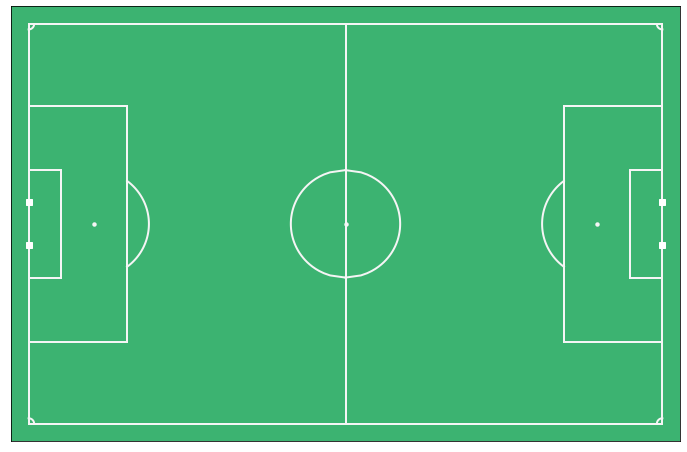

In [0]:
fig, ax = mviz.plot_pitch()

### Dibujar los pases y disparos antes del segundo y tercer gol en el partido

In [0]:
tiros_equipoLocal = eventos_equipoLocal[eventos_equipoLocal['Type']=='SHOT']
goles_equipoLocal = tiros_equipoLocal[tiros_equipoLocal['Subtype'].str.contains('-GOAL')].copy()

In [0]:
goles_equipoLocal

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [0]:
pases_tiros_equipoLocal = eventos_equipoLocal[(eventos_equipoLocal['Type'].isin(['PASS','SHOT']) )] 

El objetivo en esta parte es dibujar los pases y tiros realizados antes de cada gol (en específico el segundo y tercero). En la anterior sección para una mejor comprensión separé cada eventos en diferentes variables.


```
pases_tiros_equipoLocal = eventos_equipoLocal[(eventos_equipoLocal['Type'].isin(['PASS','SHOT']) )] 
```
En la siguiente sección lo que permite realizar el **'for'** es recorrer todos los goles del equipo local de forma automática y luego ir dibujando los pases y disparos ocurridos antes de cada gol.


198 188 Player10
1118 1108 Player9
1723 1713 Player12


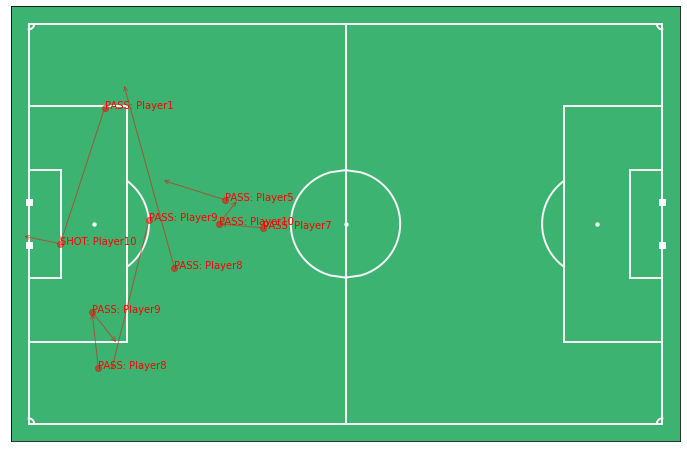

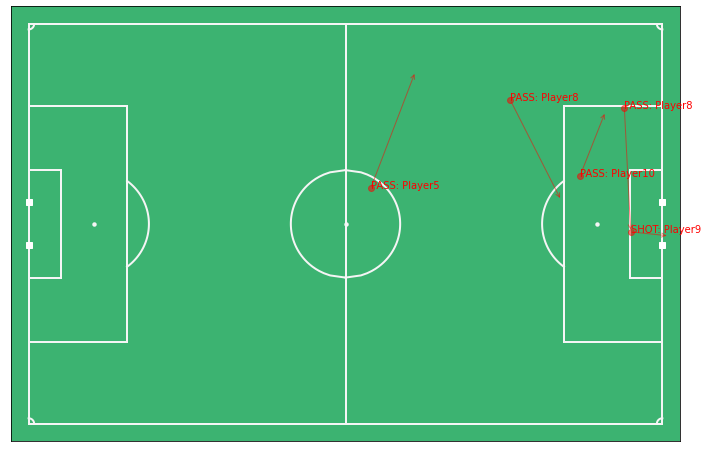

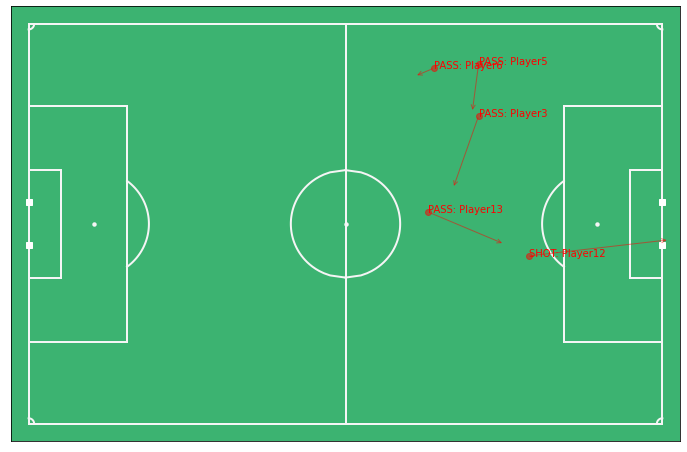

In [0]:
for index , gol in goles_equipoLocal.iterrows():
  print( index, (index-10) , gol.From)
  mviz.plot_events( pases_tiros_equipoLocal.loc[(index-8):index], indicators = ['Marker','Arrow'], annotate=True )


### Dibujar todos los tiros del jugador 9 del equipo local

In [0]:
tiros_player9_equipoLocal = tiros_equipoLocal[tiros_equipoLocal['From']=='Player9']
tiros_player9_equipoLocal

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


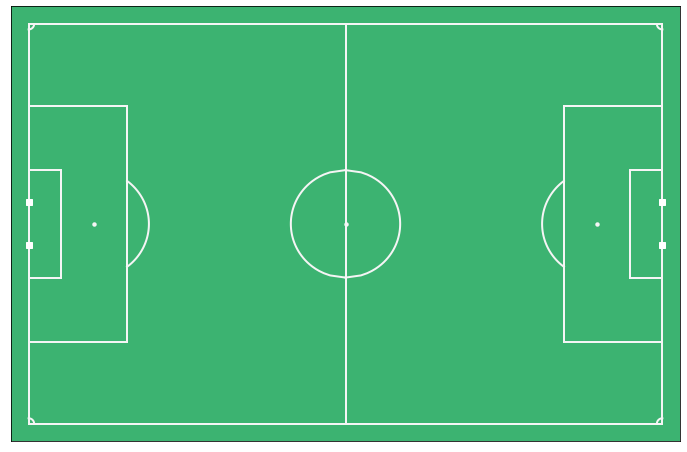

In [0]:
fig, ax = mviz.plot_pitch()


**Nota:** Use un símbolo y una transparencia diferentes (aplha) para los tiros que resultaron en goles.

De igual forma de manera iterativa vamos a dibujar todos los tiros del **Jugador 9** , anteriormente para una mejor comprensión de separó en una variables aparte estos datos.

```
tiros_player9_equipoLocal = tiros_equipoLocal[tiros_equipoLocal['From']=='Player9']
```

**¿Es necesario realizar esto?** Realmente no, sin embargo, nos permite tener un mejor orden para tratar los datos de forma independiente.



In [0]:
for index, shot in tiros_player9_equipoLocal.iterrows():
  if '-GOAL' in str(shot.Subtype):
    ax.annotate("shoot", xy=eventos_equipoLocal.loc[index][['End X','End Y']], xytext=eventos_equipoLocal.loc[index][['Start X','Start Y']], alpha=0.15, arrowprops=dict(arrowstyle="-[",color='b'))
  else:
   ax.annotate("shoot", xy=eventos_equipoLocal.loc[index][['End X','End Y']], xytext=eventos_equipoLocal.loc[index][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))


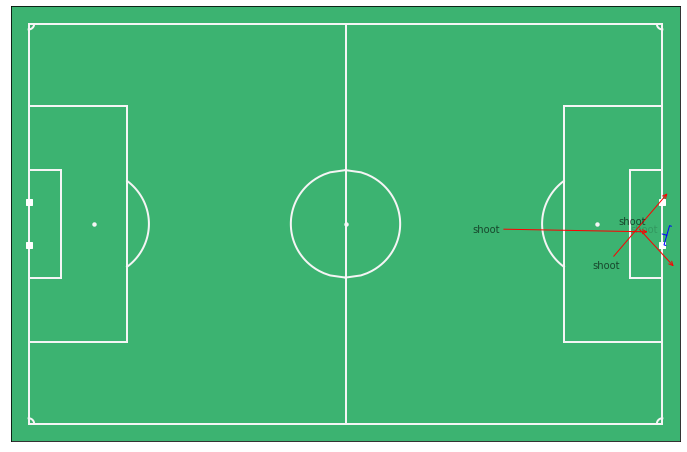

In [0]:
fig

### Dibujar las posiciones de todos los jugadores en el gol del Jugador 9

En las 2 secciones anteriores habíamos interactuado con los "Events Data" del encuentro, ahora vamos a analizar los "Tracking Data". Recordar que en los datos de seguimiento tenemos información más específica en cuanto a la ubicación del jugador en cualquier momento del encuentro.

In [0]:
tracking_equipoLocal = mio.tracking_data(ruta_datos_csv,juego_analizar,'Home')
tracking_equipoVisitante = mio.tracking_data(ruta_datos_csv,juego_analizar,'Away')
tracking_equipoLocal = mio.to_metric_coordinates(tracking_equipoLocal)
tracking_equipoVisitante = mio.to_metric_coordinates(tracking_equipoVisitante)

Reading team: home
Reading team: away


En el siguiente gráfico observamos la posición inicial de los jugadores antes del comienzo del encuentro.

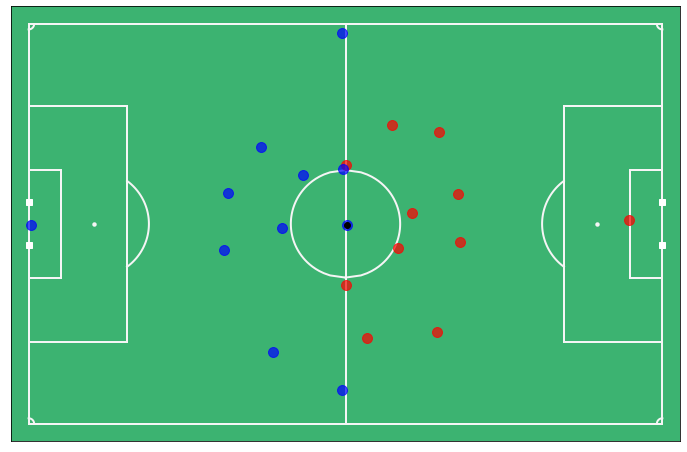

In [0]:
posicion_inicial = eventos_m.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_equipoLocal.loc[posicion_inicial], tracking_equipoVisitante.loc[posicion_inicial] )

In [0]:
tiros_player9_equipoLocal

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


De acuerdos a los datos observados en la sección anterior conocemos que el registro que tiene el gol del Jugador 9 es el 1118 y con ese datos vamos a buscar las posiciones de todos los jugadores.

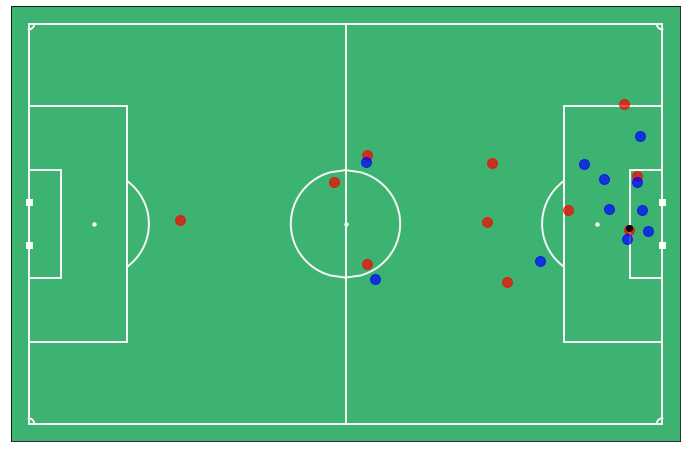

In [0]:
posicion_golPlayer9 = eventos_m.loc[1118]['Start Frame']
fig,ax = mviz.plot_frame( tracking_equipoLocal.loc[posicion_golPlayer9], tracking_equipoVisitante.loc[posicion_golPlayer9], figax = (fig,ax) )
fig

### Calcular el recorrido realizado por cada jugador

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Metrica_Velocities as mvel

In [0]:
tracking_home_v,tracking_away_v,eventos_m_v = mio.to_single_playing_direction(tracking_equipoLocal,tracking_equipoVisitante,eventos_m)

Otras de las ventajas con los datos se seguimientos es que podemos calcular temas físicos por ejemplo los km recorrido por los jugadores. La librería **Metrica_Velocities** nos permitirá realizar esos cálculos.

In [0]:
tracking_home_v = mvel.calc_player_velocities(tracking_home_v,smoothing=True)
tracking_away_v = mvel.calc_player_velocities(tracking_away_v,smoothing=True)

In [0]:
home_players = np.unique( [ c.split('_')[1] for c in tracking_home_v.columns if c[:4] == 'Home' ] )
home_summary = pd.DataFrame(index=home_players)

In [0]:
distance = []

In [0]:
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    player_distance = tracking_home_v[column].sum()/25./1000 # this is the sum of the distance travelled from one observation to the next (1/25 = 40ms) in km.
    distance.append( player_distance )
home_summary['Distance [km]'] = distance

Text(0, 0.5, 'Distance covered [km]')

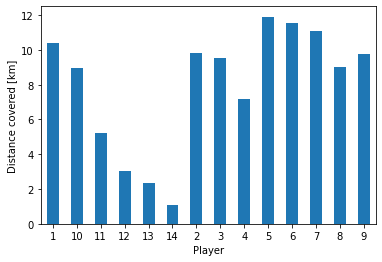

In [0]:
plt.subplots()
ax = home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')


En el gráfico podemos determinar que del equipo local el jugador que más recorrido tuvo fue el "5".